# Time series analysis with pandas
By Nikolay Koldunov
source: http://earthpy.org/pandas-basics.html

This tutorial reflects the work of:
Name : Mukhamad Suhermanto
Date : May 5th, 2020

In [12]:
# Importing relevant modules
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',15) # this limit maximum numbers of rows
import urllib.request #to download file

/Users/cakherman/opt/anaconda3/envs/ABE651/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  after removing the cwd from sys.path.


In [5]:
#to turn on the inline graphic for the notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Checking Pandas version
pd.__version__

'1.0.3'

# Loading data

In [33]:
# Downloading data using !curl and !wget does not work
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii >> 'monthly.ao.index.b50.current.ascii'
#!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
dld_data= urllib.request.urlopen('http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii')

In [34]:
ao = np.loadtxt(dld_data)

In [35]:
ao[0:2]

array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01]])

In [36]:
ao.shape

(844, 3)

# Time Series

We would like to convert this data in to time series, that can be manipulated naturally and easily. First step, that we have to do is to create the range of dates for our time series. From the file it is clear, that record starts at January 1950. We will start our dates at January 1950 and generate as many time stamps as we have records. Frequency of the data is one month (freq='M').

In [37]:
# Convert data into time series
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

In [38]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', length=844, freq='M')

In [39]:
dates.shape

(844,)

Now we are ready to create our first time series. Dates from the dates variable will be our index, and AO values will be our, hm... values:

In [42]:
AO = Series(ao[:,2], index=dates)

In [43]:
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
                ...   
2019-12-31    0.412070
2020-01-31    2.419000
2020-02-29    3.417200
2020-03-31    2.641400
2020-04-30    0.928110
Freq: M, Length: 844, dtype: float64

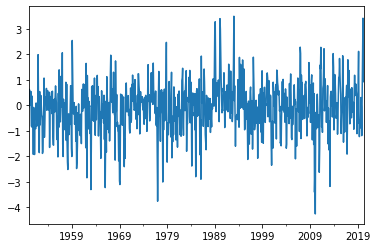

In [44]:
AO.plot()

10 Years span

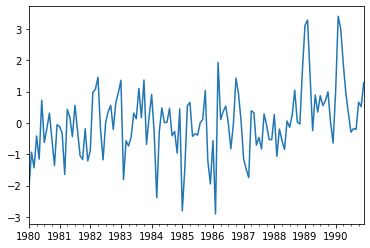

In [46]:
AO['1980':'1990'].plot()

1 year span

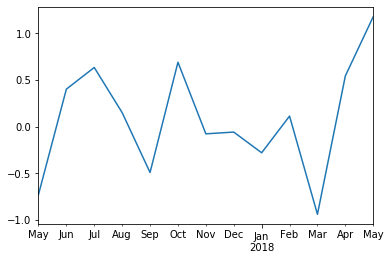

In [49]:
AO['2017-05':'2018-05'].plot()

In [50]:
# getting individual values
AO[120]

-2.4842

In [51]:
# getting individual values using certain dates
AO['2017-01']

2017-01-31    0.94197
Freq: M, dtype: float64

In [54]:
# getting certain data for 1-whole year
AO['2018']

2018-01-31   -0.28084
2018-02-28    0.11273
2018-03-31   -0.94112
2018-04-30    0.54391
2018-05-31    1.17960
2018-06-30    0.37988
2018-07-31    0.61175
2018-08-31    0.83607
2018-09-30    0.58451
2018-10-31    0.41277
2018-11-30   -1.11620
2018-12-31    0.10973
Freq: M, dtype: float64

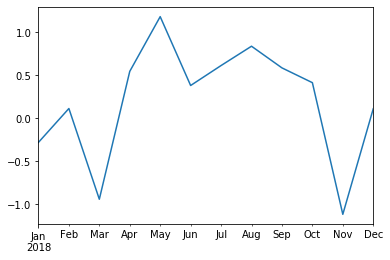

In [55]:
AO['2018'].plot()

In [56]:
# Certain values
AO[AO > 0]

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
                ...   
2019-12-31    0.412070
2020-01-31    2.419000
2020-02-29    3.417200
2020-03-31    2.641400
2020-04-30    0.928110
Length: 398, dtype: float64

# Data Frame

Using NOA time series
Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

In [64]:
nao_df= urllib.request.urlopen('http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii')

In [65]:
nao = np.loadtxt(nao_df)
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')

In [66]:
NAO = Series(nao[:,2], index=dates_nao)

In [67]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', length=844, freq='M')

Create data frame that contain both AO and NAO data.
It sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [68]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1233b1e90>,
      dtype=object)

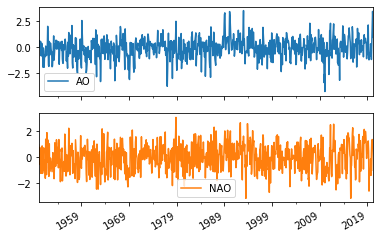

In [69]:
aonao.plot(subplots=True)

In [70]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


In [71]:
aonao['NAO']

1950-01-31    0.9200
1950-02-28    0.4000
1950-03-31   -0.3600
1950-04-30    0.7300
1950-05-31   -0.5900
               ...  
2019-12-31    1.2016
2020-01-31    1.3432
2020-02-29    1.2570
2020-03-31    1.0126
2020-04-30   -1.0224
Freq: M, Name: NAO, Length: 844, dtype: float64

In [72]:
aonao.NAO

1950-01-31    0.9200
1950-02-28    0.4000
1950-03-31   -0.3600
1950-04-30    0.7300
1950-05-31   -0.5900
               ...  
2019-12-31    1.2016
2020-01-31    1.3432
2020-02-29    1.2570
2020-03-31    1.0126
2020-04-30   -1.0224
Freq: M, Name: NAO, Length: 844, dtype: float64

In [73]:
# Adding difference (AO-NAO) new column
aonao['Diff'] = aonao['AO'] - aonao['NAO']

In [74]:
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


In [75]:
# Deleting Diff column
del aonao['Diff']
aonao.tail()

,AO,NAO
2019-12-31,0.41207,1.2016
2020-01-31,2.41900,1.3432
2020-02-29,3.41720,1.2570
2020-03-31,2.64140,1.0126
2020-04-30,0.92811,-1.0224


In [76]:
#Slicing
aonao['1991-01': '2001-01']

,AO,NAO
1991-01-31,0.72323,0.86
1991-02-28,-0.87599,1.04
1991-03-31,-0.52680,-0.20
1991-04-30,0.53021,0.29
1991-05-31,0.48649,0.08
...,...,...
2000-09-30,0.39486,-0.21
2000-10-31,0.31678,0.92
2000-11-30,-1.58150,-0.92
2000-12-31,-2.35440,-0.58


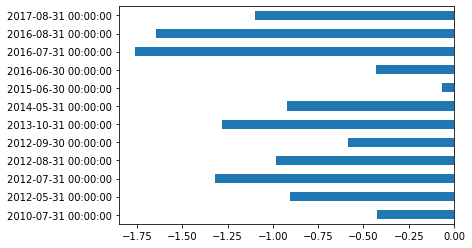

In [80]:
# some advanced combination
import datetime

aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0) #first arg only > 0 from AO and only <0 from NAO
          & (aonao.index > datetime.datetime(2010,1,1)) #range of starting period
          & (aonao.index < datetime.datetime(2019,1,1)), #range of finishing period
          'NAO'].plot(kind='barh') #plot only for NAO value
        

Here we use special advanced indexing attribute .ix. We choose all NAO values in the 1980s for months where AO is positive and NAO is negative, and then plot them. Magic :)

# Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [81]:
aonao.mean()

AO    -0.095526
NAO   -0.000685
dtype: float64

In [82]:
aonao.max()

AO     3.4953
NAO    3.0400
dtype: float64

In [83]:
aonao.min()

AO    -4.2657
NAO   -3.1800
dtype: float64

Row-wise basic stats

In [85]:
aonao.mean(1)

1950-01-31    0.429845
1950-02-28    0.513405
1950-03-31   -0.184064
1950-04-30    0.642550
1950-05-31   -0.259211
                ...   
2019-12-31    0.806835
2020-01-31    1.881100
2020-02-29    2.337100
2020-03-31    1.827000
2020-04-30   -0.047145
Freq: M, Length: 844, dtype: float64

Get everything at once

In [86]:
aonao.describe()

,AO,NAO
count,844.000000,844.000000
mean,-0.095526,-0.000685
std,1.013428,1.021481
min,-4.265700,-3.180000
25%,-0.650125,-0.752500
50%,-0.036037,0.060000
75%,0.494690,0.720000
max,3.495300,3.040000


# Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates annual ('A') mean:

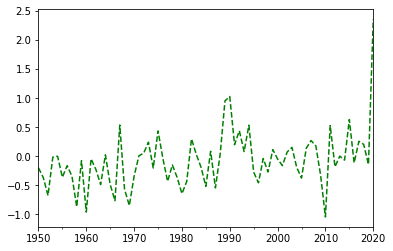

In [100]:
AO_mm = AO.resample('A').mean()
AO_mm.plot(style='g--')
plt.savefig('AO Annual Mean.png') # to so PNG file

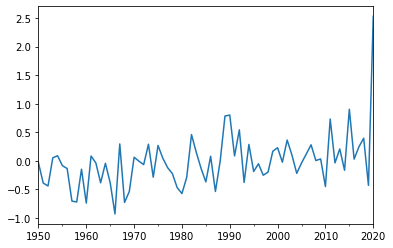

In [101]:
AO_mm = AO.resample('A').median()
AO_mm.plot()
plt.savefig('AO Annual Median.png')

Using resampling method for 3 years using np.max

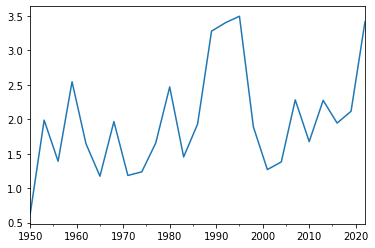

In [102]:
AO_mm = AO.resample('3A').apply(np.max)
AO_mm.plot()

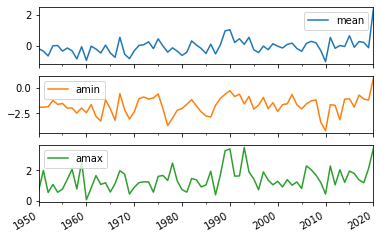

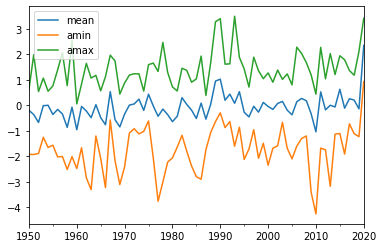

In [109]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True) # for subplots type
AO_mm['1900':'2020'].plot() #for all in one plot
plt.savefig('Mean, Min, & Max of AO.png')

In [105]:
AO_mm

,mean,amin,amax
1950-12-31,-0.199501,-1.92810,0.62681
1951-12-31,-0.364626,-1.93410,1.98720
1952-12-31,-0.674990,-1.89090,0.53852
1953-12-31,-0.016515,-1.25580,1.06830
1954-12-31,-0.000770,-1.65610,0.55259
...,...,...,...
2016-12-31,-0.114137,-1.91730,1.78640
2017-12-31,0.256308,-0.73014,1.36540
2018-12-31,0.202732,-1.11620,1.17960
2019-12-31,-0.142024,-1.23130,2.11610


# Moving/ Rolling Statistics

Pandas provide good collection of moving statistics.

Rolling mean:

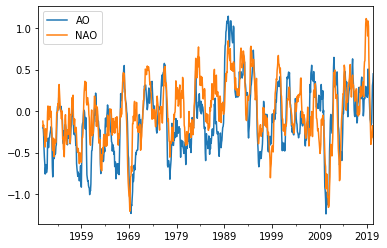

In [110]:
aonao.rolling(window=12, center=False).mean().plot()

Rolling correlation:

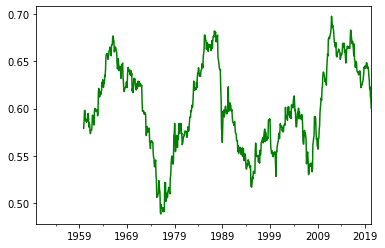

In [107]:
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-g')

By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [108]:
aonao.corr()

,AO,NAO
AO,1.000000,0.604342
NAO,0.604342,1.000000
